In [123]:
import numpy as np
import pandas as pd
import os
from datetime import datetime,timedelta
import math
import matplotlib.pyplot as plt
import seaborn  



In [124]:
from_str='2023-06-26'
to_str='2023-09-01'
feq ='W-FRI'  
#feq ='M'

In [125]:
data_file=r"D:\PythonDev\MyQuantFinProject\data\thai-active_2023-now.csv"
title='thai-active_2023-now'
report_path=f'report'


print(report_path)

report


In [126]:
# build period datafrme
period_index=pd.date_range(start=from_str,end=to_str, freq=feq)
print(period_index)

list_period_index=list(period_index)
if feq=='M':
    if  list_period_index[-1] < datetime.strptime(to_str,'%Y-%m-%d'):
     list_period_index.append(datetime.strptime(to_str,'%Y-%m-%d'))
print(list_period_index)

DatetimeIndex(['2023-06-30', '2023-07-07', '2023-07-14', '2023-07-21',
               '2023-07-28', '2023-08-04', '2023-08-11', '2023-08-18',
               '2023-08-25', '2023-09-01'],
              dtype='datetime64[ns]', freq='W-FRI')
[Timestamp('2023-06-30 00:00:00', freq='W-FRI'), Timestamp('2023-07-07 00:00:00', freq='W-FRI'), Timestamp('2023-07-14 00:00:00', freq='W-FRI'), Timestamp('2023-07-21 00:00:00', freq='W-FRI'), Timestamp('2023-07-28 00:00:00', freq='W-FRI'), Timestamp('2023-08-04 00:00:00', freq='W-FRI'), Timestamp('2023-08-11 00:00:00', freq='W-FRI'), Timestamp('2023-08-18 00:00:00', freq='W-FRI'), Timestamp('2023-08-25 00:00:00', freq='W-FRI'), Timestamp('2023-09-01 00:00:00', freq='W-FRI')]


In [127]:
fundPerfByPeriod_df=pd.DataFrame(data=list_period_index,columns=['End_Date'])
fundPerfByPeriod_df['Start_Date']=np.nan
fundPerfByPeriod_df=fundPerfByPeriod_df[['Start_Date','End_Date']]
fundPerfByPeriod_df

,Start_Date,End_Date
0,NaN,2023-06-30
1,NaN,2023-07-07
2,NaN,2023-07-14
3,NaN,2023-07-21
4,NaN,2023-07-28
5,NaN,2023-08-04
6,NaN,2023-08-11
7,NaN,2023-08-18
8,NaN,2023-08-25
9,NaN,2023-09-01


In [128]:
print(f"Create the first date of each {feq} by iteration")
for index,row in fundPerfByPeriod_df.iterrows():
    if index==0:
       fundPerfByPeriod_df.iloc[0,0]=datetime.strptime(from_str,'%Y-%m-%d')
    else:
        # get End_Date(last day of Year, Quater,Month) of previouse row 
        prev_end_date= fundPerfByPeriod_df.iloc[index-1,1] 
        start_date=prev_end_date + timedelta(days = 1) # 
        fundPerfByPeriod_df.iloc[index,0]=start_date 
    # print(fundPerfByPeriod_df) 
    # print(f"=================index={index}=================")
print(fundPerfByPeriod_df.info())
fundPerfByPeriod_df

Create the first date of each W-FRI by iteration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  10 non-null     object        
 1   End_Date    10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 288.0+ bytes
None


,Start_Date,End_Date
0,2023-06-26 00:00:00,2023-06-30
1,2023-07-01 00:00:00,2023-07-07
2,2023-07-08 00:00:00,2023-07-14
3,2023-07-15 00:00:00,2023-07-21
4,2023-07-22 00:00:00,2023-07-28
5,2023-07-29 00:00:00,2023-08-04
6,2023-08-05 00:00:00,2023-08-11
7,2023-08-12 00:00:00,2023-08-18
8,2023-08-19 00:00:00,2023-08-25
9,2023-08-26 00:00:00,2023-09-01


In [129]:
fundPerfByPeriod_df['Start_Date']=pd.to_datetime(fundPerfByPeriod_df['Start_Date'],format='%Y-%m-%d %H:%M:%S')  

fundPerfByPeriod_df['Period']= fundPerfByPeriod_df.apply( lambda item:f"{item['Start_Date'].strftime('%d')}{item['Start_Date'].strftime('%b')}{item['Start_Date'].strftime('%y')}-{item['End_Date'].strftime('%d')}{item['End_Date'].strftime('%b')}{item['End_Date'].strftime('%y')}"  ,axis=1  )
fundPerfByPeriod_df.info()
fundPerfByPeriod_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_Date  10 non-null     datetime64[ns]
 1   End_Date    10 non-null     datetime64[ns]
 2   Period      10 non-null     object        
dtypes: datetime64[ns](2), object(1)
memory usage: 368.0+ bytes


,Start_Date,End_Date,Period
0,2023-06-26,2023-06-30,26Jun23-30Jun23
1,2023-07-01,2023-07-07,01Jul23-07Jul23
2,2023-07-08,2023-07-14,08Jul23-14Jul23
3,2023-07-15,2023-07-21,15Jul23-21Jul23
4,2023-07-22,2023-07-28,22Jul23-28Jul23
5,2023-07-29,2023-08-04,29Jul23-04Aug23
6,2023-08-05,2023-08-11,05Aug23-11Aug23
7,2023-08-12,2023-08-18,12Aug23-18Aug23
8,2023-08-19,2023-08-25,19Aug23-25Aug23
9,2023-08-26,2023-09-01,26Aug23-01Sep23


In [130]:
df = pd.read_csv(data_file,index_col='Date/Time',parse_dates=['Date/Time'],dayfirst=True)
df.index.set_names('date',inplace=True)
df.rename(columns={'Ticker':'symbol','close':'price'},inplace=True)
df=df[['symbol','price']]
df.info()
print(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1141 entries, 2023-01-03 to 2023-09-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  1141 non-null   object 
 1   price   1141 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.7+ KB
           symbol  price
date                    
2023-08-28  TSF-A  77.11
2023-08-29  TSF-A  77.20
2023-08-30  TSF-A  77.66
2023-08-31  TSF-A  76.89
2023-09-01  TSF-A  76.77


In [131]:
list_fund_name=df['symbol'].unique().tolist()  
print(list_fund_name)

['ASP-T12', 'ASP-THEQ', 'K-SET50', 'KKP-ACT-EQ-A', 'KFDYNAMIC', 'TISCOFLEXP', 'TSF-A']


In [132]:
dictPriceOfFund={}
for name in list_fund_name:
  fund_df=df.query('symbol==@name')
  fund_df=fund_df.loc[from_str:to_str,['price']]
  fund_df.sort_index(inplace=True)
  if len(fund_df)  >0:
      dictPriceOfFund[name]=fund_df  
      print(f"======={name} : {len(fund_df)}==========")  
      print(fund_df.tail(3))    
        

=======ASP-T12 : 47==========
            price
date             
2023-08-30  11.94
2023-08-31  11.92
2023-09-01  11.72
=======ASP-THEQ : 47==========
            price
date             
2023-08-30  15.53
2023-08-31  15.55
2023-09-01  15.37
=======K-SET50 : 47==========
            price
date             
2023-08-30  34.27
2023-08-31  33.94
2023-09-01  33.94
=======KKP-ACT-EQ-A : 47==========
            price
date             
2023-08-30  17.30
2023-08-31  17.18
2023-09-01  17.15
=======KFDYNAMIC : 47==========
            price
date             
2023-08-30  39.90
2023-08-31  39.66
2023-09-01  39.49
=======TISCOFLEXP : 47==========
            price
date             
2023-08-30  57.68
2023-08-31  57.51
2023-09-01  57.01
=======TSF-A : 47==========
            price
date             
2023-08-30  77.66
2023-08-31  76.89
2023-09-01  76.77


In [133]:
report_path=os.path.join (report_path, f"{title}-{feq}-{from_str}_{to_str}")
if not os.path.exists(report_path):
 os.makedirs(report_path)



In [134]:
def create_pct_acc_df(df_temp,start_pct,end_pct):
    df_temp=fund_df.loc[start_pct:end_pct,:]
    df_temp['return_pct']=df_temp['price'].pct_change()  
    df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
    df_temp=df_temp.drop(columns=['price','return_pct'])
    df_temp.fillna(1,inplace=True)   
    return df_temp
    

plot chart line to compare return performace on each period


C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

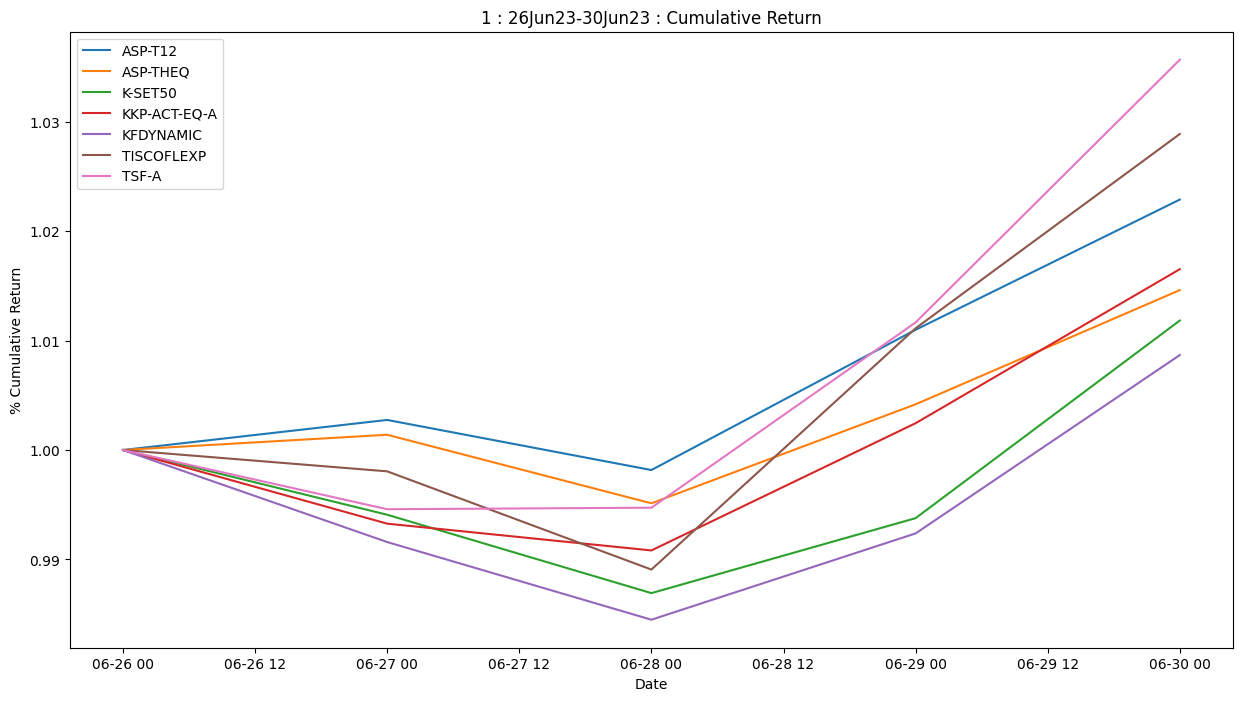

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

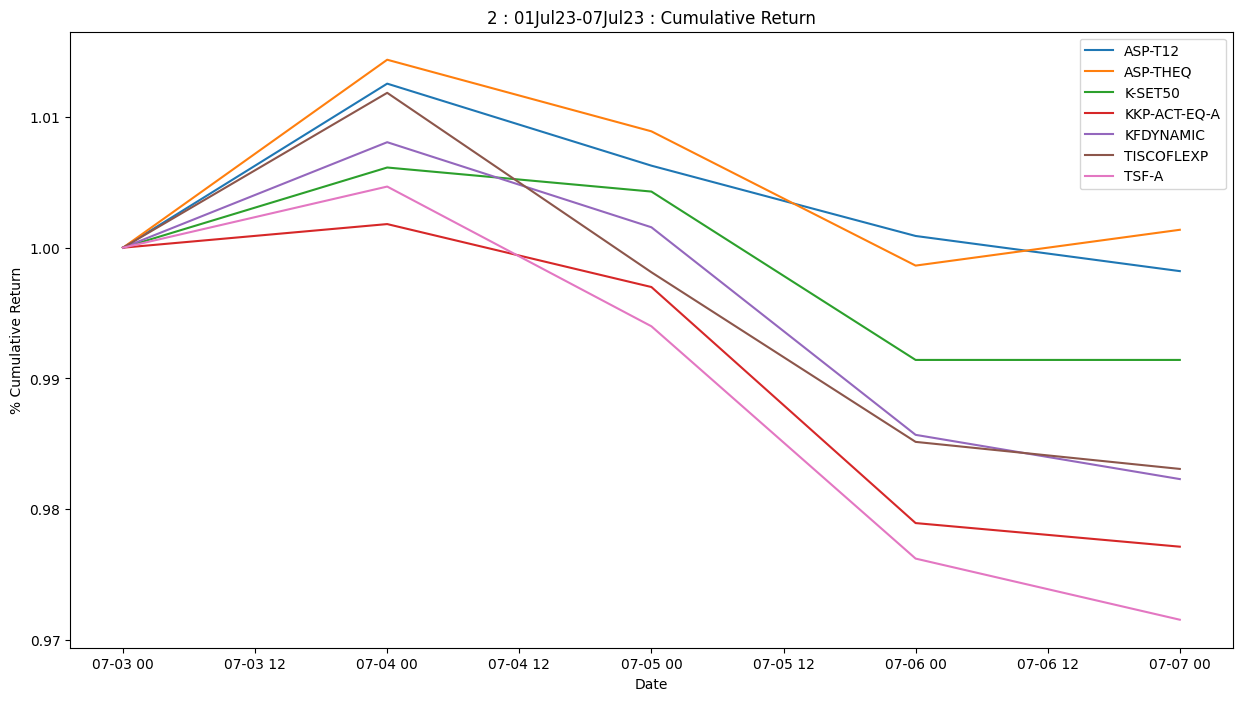

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

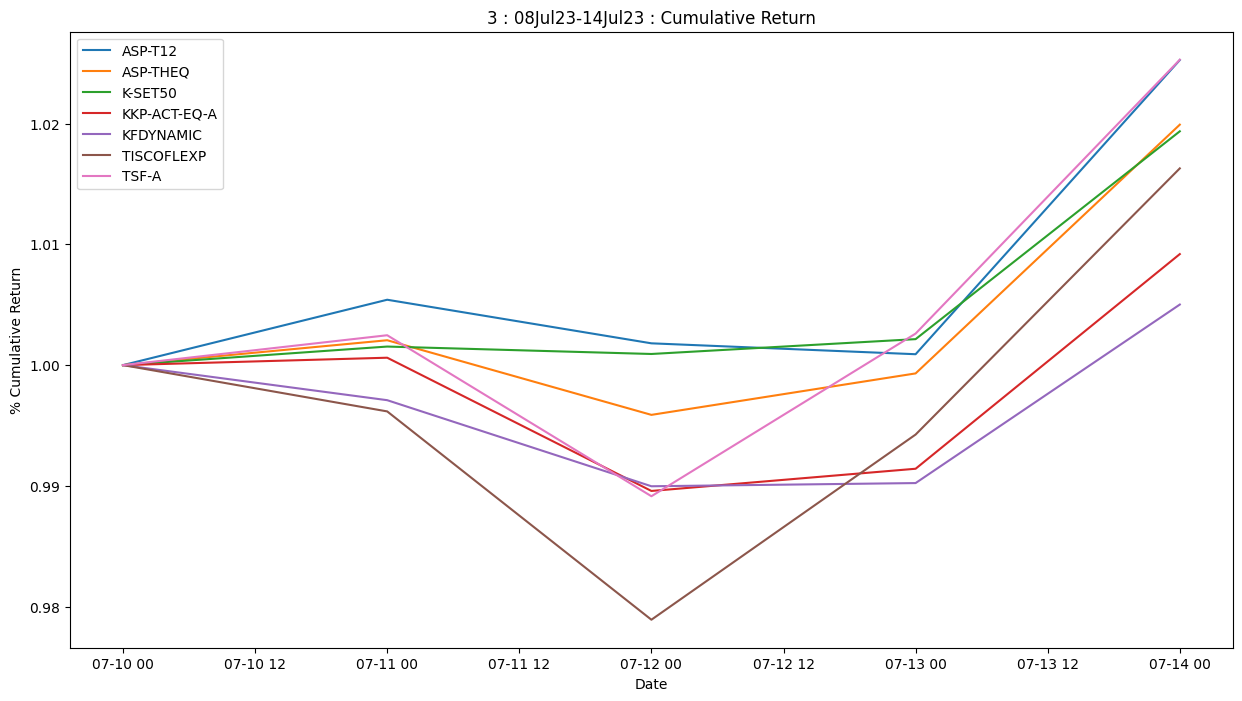

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

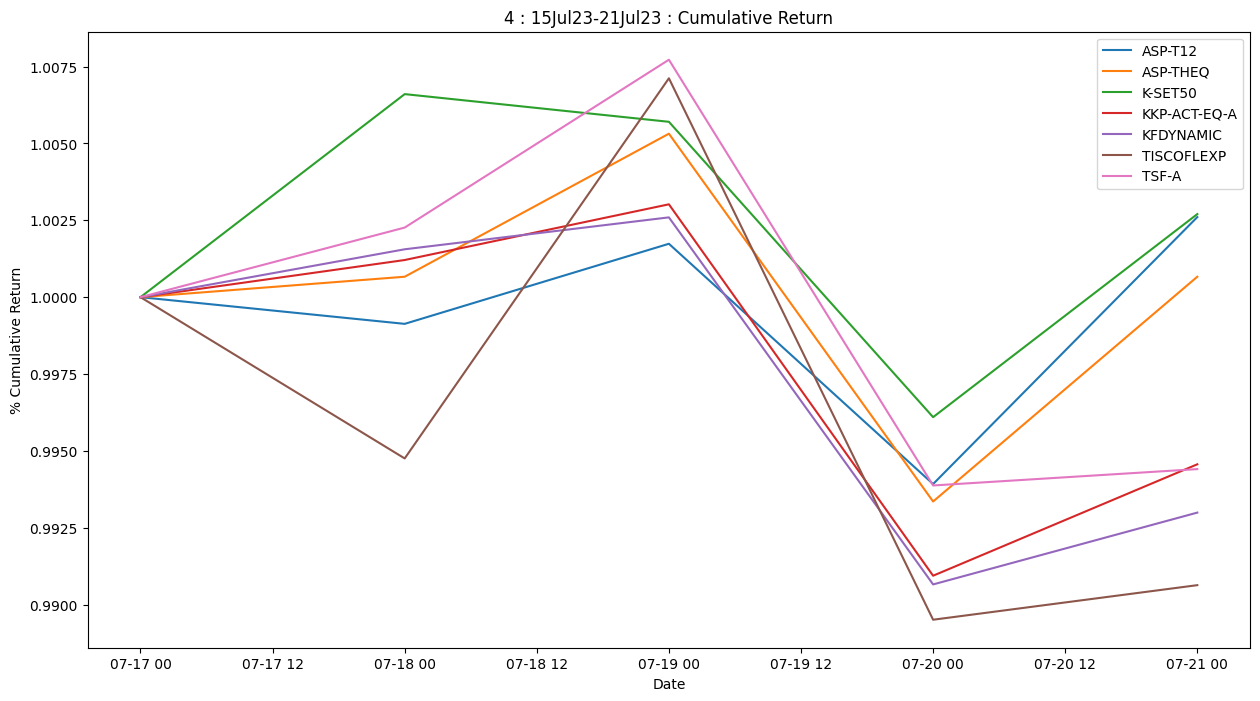

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

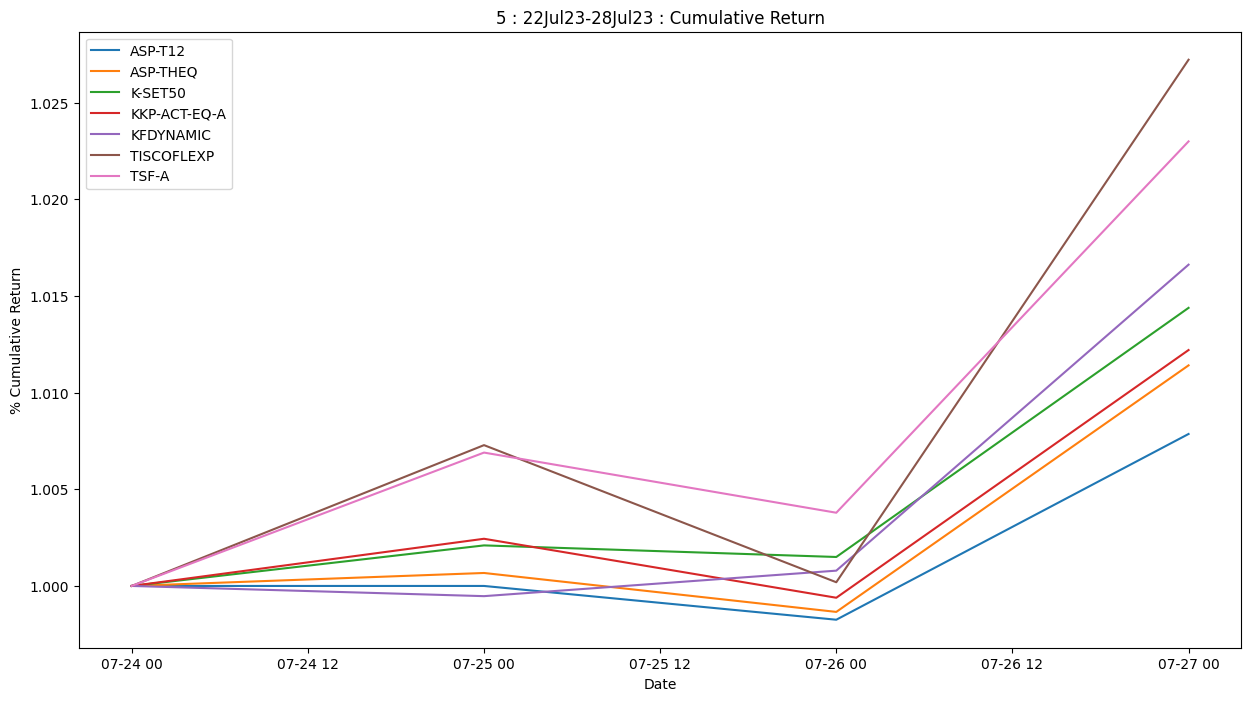

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

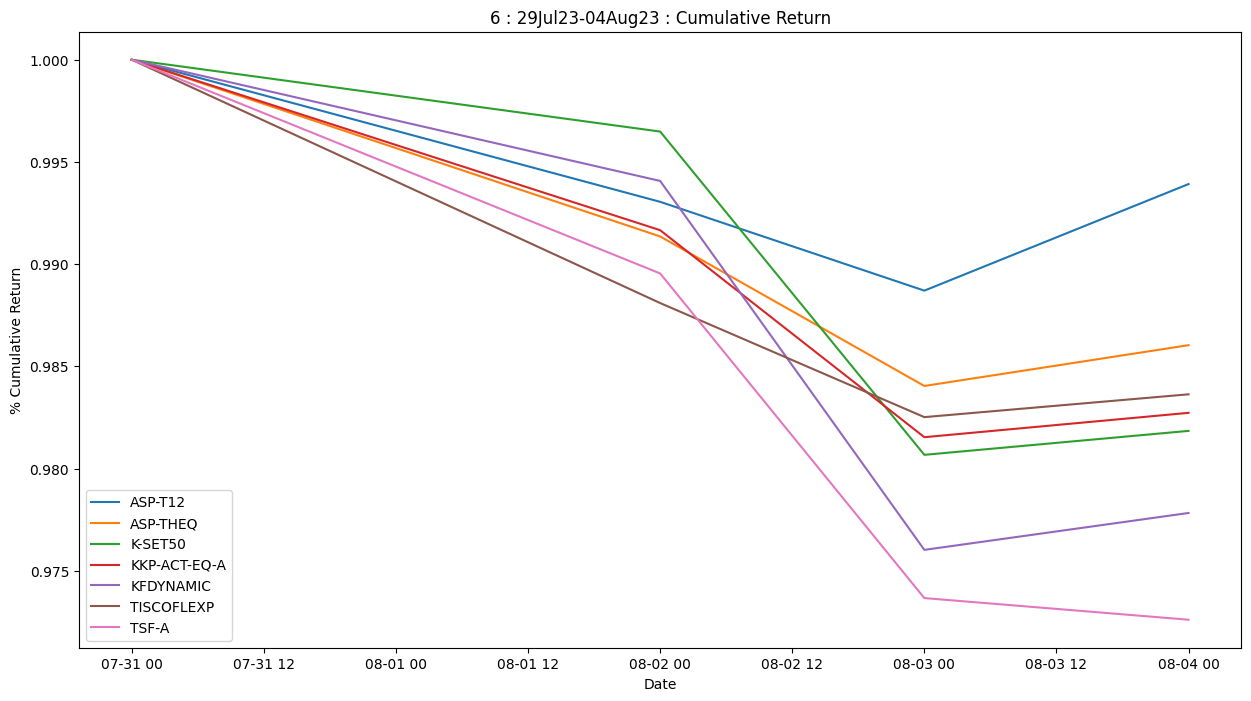

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

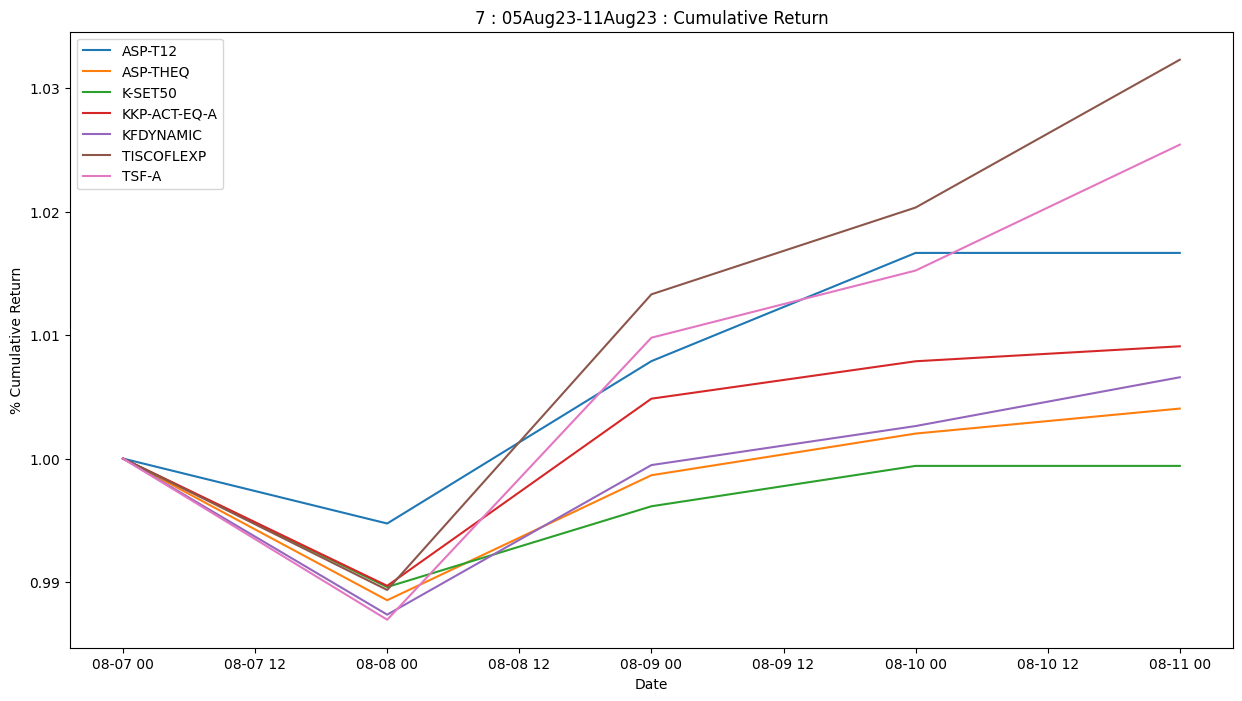

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

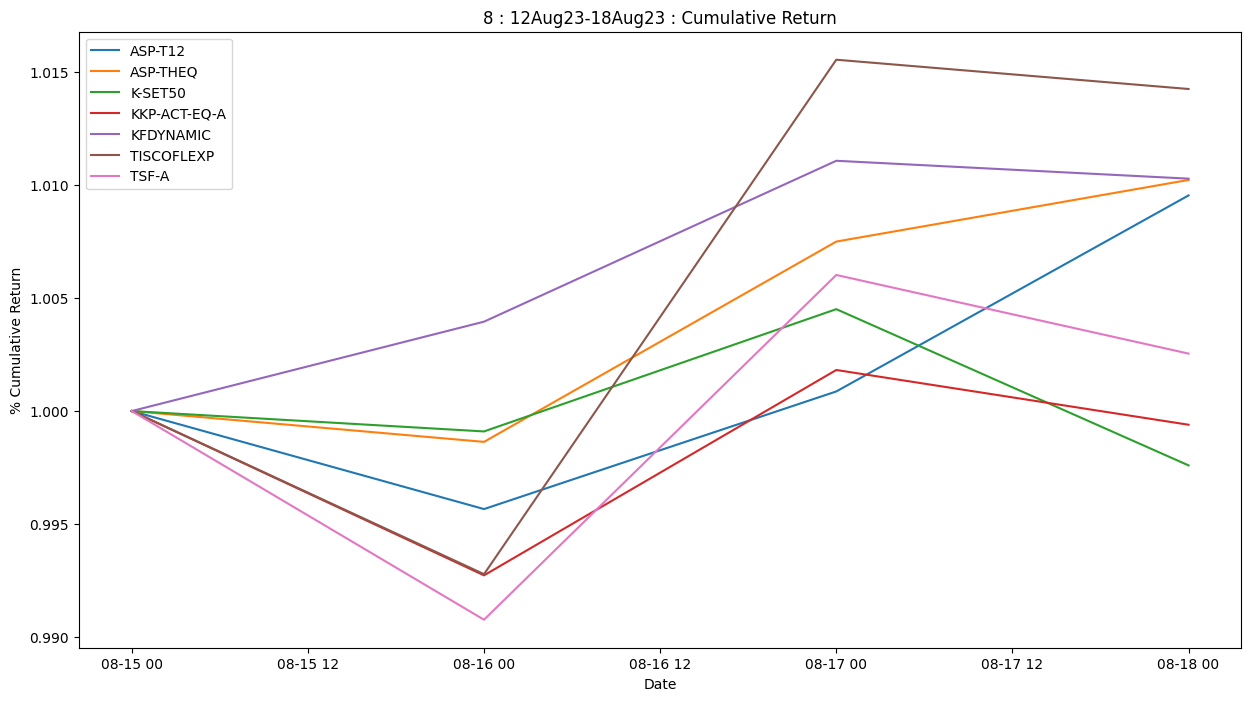

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

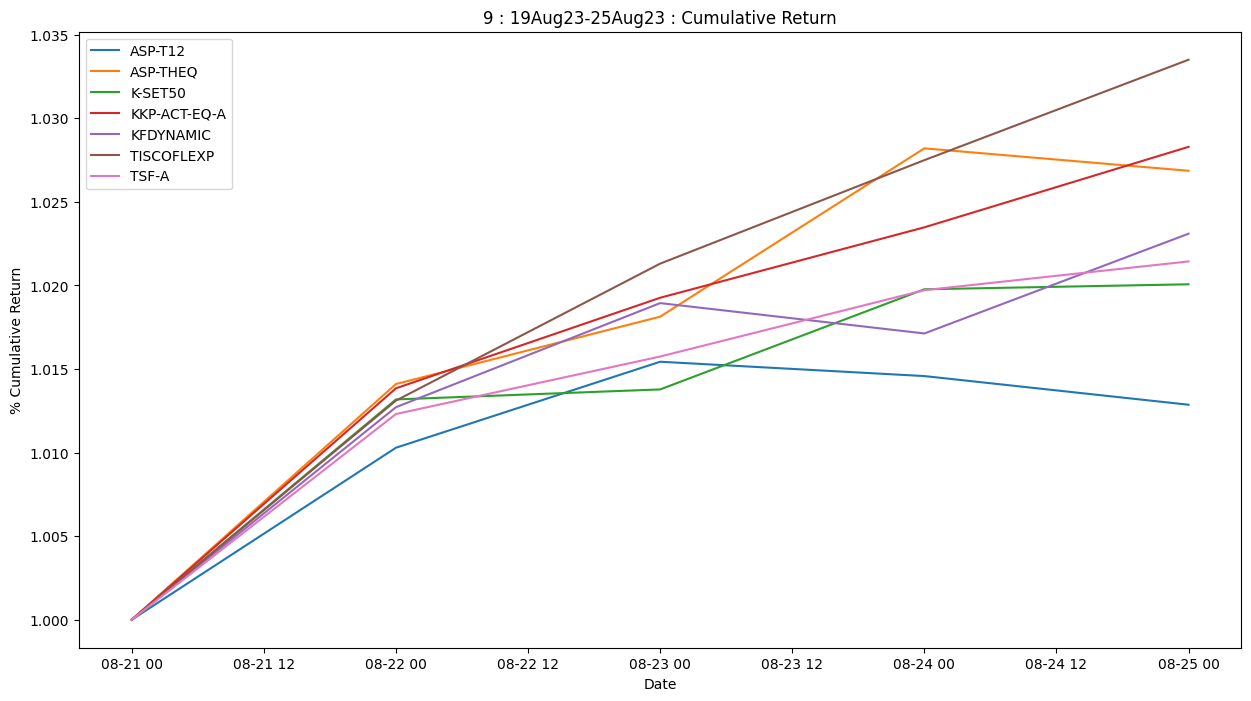

C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['return_pct']=df_temp['price'].pct_change()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['cum_return_pct']=(1+df_temp['return_pct']).cumprod()
C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3838046351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

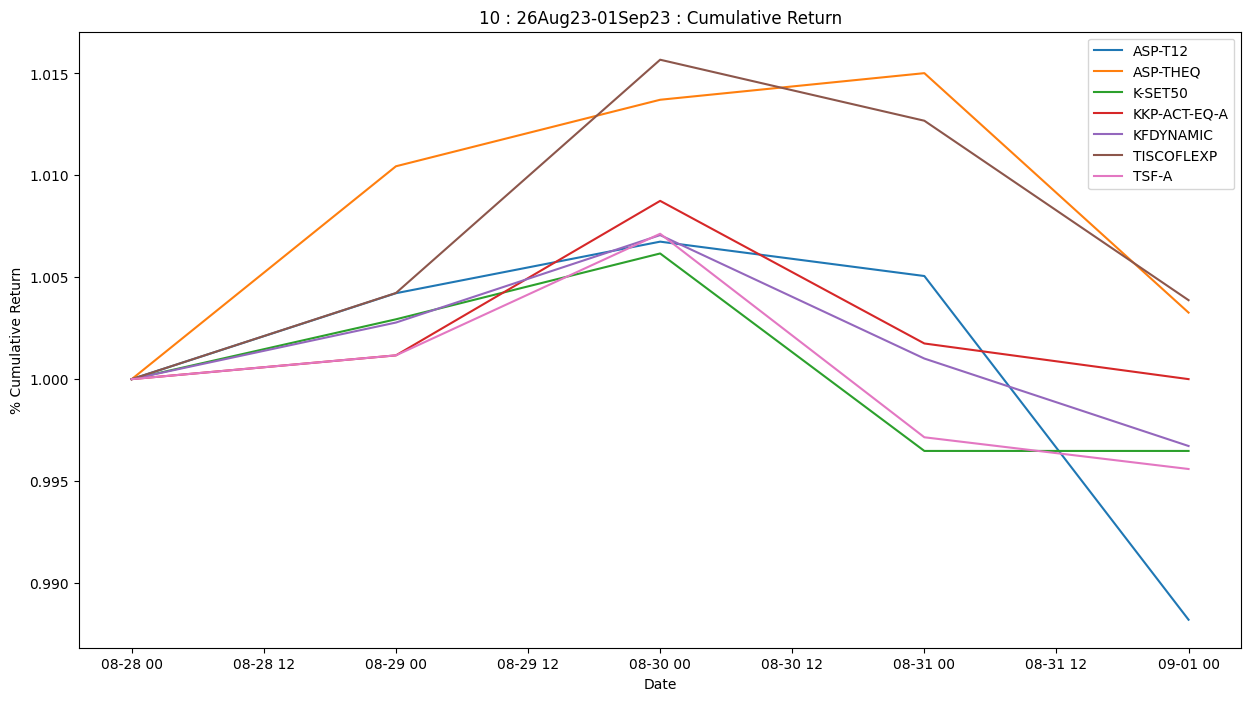

In [135]:
print("plot chart line to compare return performace on each period")
count_pic=0
for index,item in fundPerfByPeriod_df.iterrows():
    start_date=item['Start_Date']
    end_date=item['End_Date'] 
    fig = plt.figure(figsize = (15, 8))
    for fund_name,fund_df in dictPriceOfFund.items():
        df=create_pct_acc_df(fund_df,start_date,end_date) 
        plt.plot(df.index,df['cum_return_pct'],label =fund_name)  
    plt.legend()    
    plt.xlabel("Date")
    plt.ylabel("% Cumulative Return")
    
    count_pic=count_pic+1
    plt.title(f"{count_pic} : {item['Period']} : Cumulative Return")
    
    plt.savefig(f'{report_path}\\{count_pic}-{item["Period"]}.png')
    plt.show() 
    


In [136]:
def cal_percent_return(item,fundTemp_df):
    start_date=item['Start_Date']
    end_date=item['End_Date']
    tempDF=fundTemp_df.loc[start_date:end_date,:]
    if tempDF.empty==False:
      start_price=float(tempDF.iloc[0, 0])
      end_price=float(tempDF.iloc[len(tempDF)-1, 0])   
      invest_return=(  end_price- start_price)/ start_price*100
      invest_return=round(invest_return,2)  
                        
      print(f"{start_date.strftime('%d%b%y')} to {end_date.strftime('%d%b%y')}: ROC = ({end_price}-{start_price})/{start_price}x100= {invest_return} %")    
      return invest_return                  
    else:
                        
      return 0                  
        
    
    

In [137]:
for name,data in dictPriceOfFund.items():
  print(f"======================{name}======================")  
  fundPerfByPeriod_df[name]=fundPerfByPeriod_df.apply(cal_percent_return,axis=1,args=(data,))

fundPerfByPeriod_df["_AVG_"]=fundPerfByPeriod_df[list_fund_name].mean(axis=1,skipna=True).round(2)

fundPerfByPeriod_df.set_index('Period',inplace=True)   


======================ASP-T12======================
26Jun23 to 30Jun23: ROC = (11.18-10.93)/10.93x100= 2.29 %
01Jul23 to 07Jul23: ROC = (11.14-11.16)/11.16x100= -0.18 %
08Jul23 to 14Jul23: ROC = (11.36-11.08)/11.08x100= 2.53 %
15Jul23 to 21Jul23: ROC = (11.55-11.52)/11.52x100= 0.26 %
22Jul23 to 28Jul23: ROC = (11.54-11.45)/11.45x100= 0.79 %
29Jul23 to 04Aug23: ROC = (11.44-11.51)/11.51x100= -0.61 %
05Aug23 to 11Aug23: ROC = (11.6-11.41)/11.41x100= 1.67 %
12Aug23 to 18Aug23: ROC = (11.64-11.53)/11.53x100= 0.95 %
19Aug23 to 25Aug23: ROC = (11.81-11.66)/11.66x100= 1.29 %
26Aug23 to 01Sep23: ROC = (11.72-11.86)/11.86x100= -1.18 %
======================ASP-THEQ======================
26Jun23 to 30Jun23: ROC = (14.59-14.38)/14.38x100= 1.46 %
01Jul23 to 07Jul23: ROC = (14.63-14.61)/14.61x100= 0.14 %
08Jul23 to 14Jul23: ROC = (14.85-14.56)/14.56x100= 1.99 %
15Jul23 to 21Jul23: ROC = (15.06-15.05)/15.05x100= 0.07 %
22Jul23 to 28Jul23: ROC = (15.07-14.9)/14.9x100= 1.14 %
29Jul23 to 04Aug23: ROC =

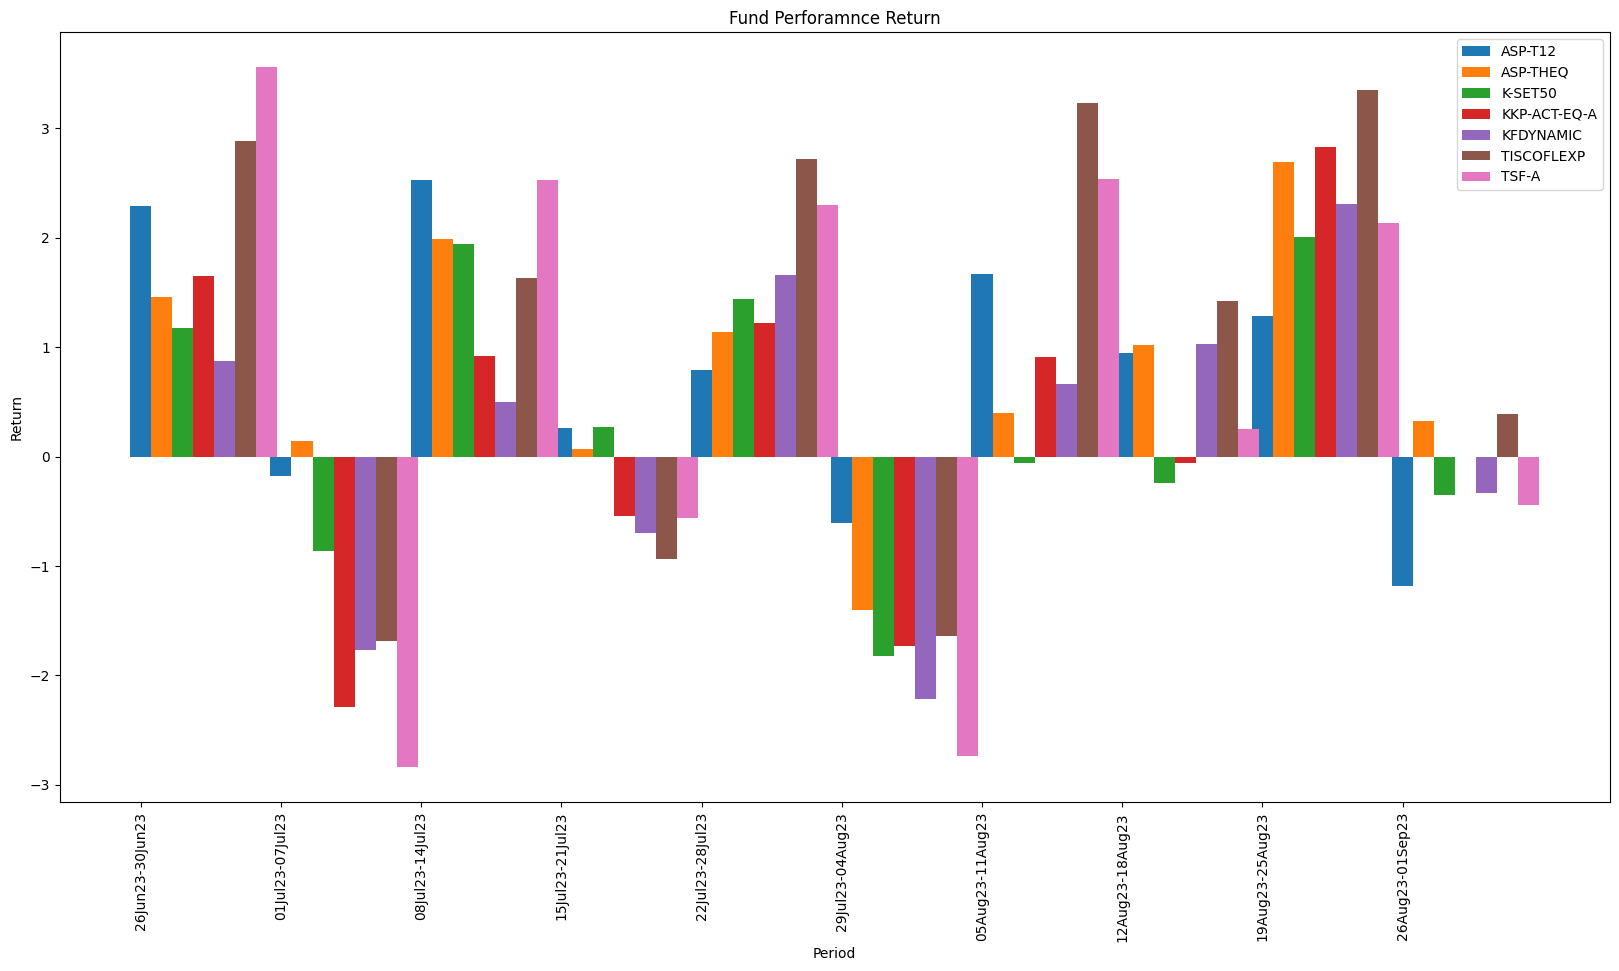

In [138]:
fundReturn_df=fundPerfByPeriod_df[list_fund_name]
fig = plt.figure(figsize = (20, 10))
X_axis = np.arange(len(fundReturn_df)) # length of column to fix axis=y
X_point=0.00
X_width=0.15

for colName  in fundReturn_df.columns:
    
    plt.bar(X_axis+X_point,fundReturn_df[colName],X_width, label =colName)
    X_point+=X_width

# length of column to fix axis=y
plt.xticks(X_axis, fundReturn_df.index,rotation='vertical')
plt.xlabel("Period")
plt.ylabel("Return")
plt.title(f"Fund Perforamnce Return")
plt.legend()

plt.savefig(f'{report_path}\\Return_{from_str}_{to_str}.png')

plt.show()



In [139]:
fundPerfByPeriod_df

,Start_Date,End_Date,ASP-T12,ASP-THEQ,K-SET50,KKP-ACT-EQ-A,KFDYNAMIC,TISCOFLEXP,TSF-A,_AVG_
Period,,,,,,,,,,
26Jun23-30Jun23,2023-06-26,2023-06-30,2.29,1.46,1.18,1.65,0.87,2.89,3.56,1.99
01Jul23-07Jul23,2023-07-01,2023-07-07,-0.18,0.14,-0.86,-2.29,-1.77,-1.69,-2.84,-1.36
08Jul23-14Jul23,2023-07-08,2023-07-14,2.53,1.99,1.94,0.92,0.50,1.63,2.53,1.72
15Jul23-21Jul23,2023-07-15,2023-07-21,0.26,0.07,0.27,-0.54,-0.70,-0.94,-0.56,-0.31
22Jul23-28Jul23,2023-07-22,2023-07-28,0.79,1.14,1.44,1.22,1.66,2.72,2.30,1.61
29Jul23-04Aug23,2023-07-29,2023-08-04,-0.61,-1.40,-1.82,-1.73,-2.22,-1.64,-2.74,-1.74
05Aug23-11Aug23,2023-08-05,2023-08-11,1.67,0.40,-0.06,0.91,0.66,3.23,2.54,1.34
12Aug23-18Aug23,2023-08-12,2023-08-18,0.95,1.02,-0.24,-0.06,1.03,1.42,0.25,0.62
19Aug23-25Aug23,2023-08-19,2023-08-25,1.29,2.69,2.01,2.83,2.31,3.35,2.14,2.37


In [140]:
def find_rank(fund_temp,list_fundX,FinalRank_ColName):
     fundPerfRank=fund_temp[list_fundX]
     fundPerfRank=fundPerfRank.T   
     for colNameToRank in fundPerfRank.columns:
      fundPerfRank[colNameToRank]=fundPerfRank[colNameToRank].rank(method='max')   
     return fundPerfRank

rankCol_name_all='AllRank'
fundRank_df=find_rank(fundPerfByPeriod_df[list_fund_name],list_fund_name,rankCol_name_all)
fundRank_df=fundRank_df.T 
fundRank_df

,ASP-T12,ASP-THEQ,K-SET50,KKP-ACT-EQ-A,KFDYNAMIC,TISCOFLEXP,TSF-A
Period,,,,,,,
26Jun23-30Jun23,5.0,3.0,2.0,4.0,1.0,6.0,7.0
01Jul23-07Jul23,6.0,7.0,5.0,2.0,3.0,4.0,1.0
08Jul23-14Jul23,7.0,5.0,4.0,2.0,1.0,3.0,7.0
15Jul23-21Jul23,6.0,5.0,7.0,4.0,2.0,1.0,3.0
22Jul23-28Jul23,1.0,2.0,4.0,3.0,5.0,7.0,6.0
29Jul23-04Aug23,7.0,6.0,3.0,4.0,2.0,5.0,1.0
05Aug23-11Aug23,5.0,2.0,1.0,4.0,3.0,7.0,6.0
12Aug23-18Aug23,4.0,5.0,1.0,2.0,6.0,7.0,3.0
19Aug23-25Aug23,1.0,5.0,2.0,6.0,4.0,7.0,3.0


In [141]:
dfSummary=pd.concat([\
                     fundPerfByPeriod_df[list_fund_name].sum().to_frame(name='sum_total_return'),\
                     fundRank_df.sum().to_frame(name='sum_rank_score'),\
                    ],axis=1)
dfSummary.fillna(value=0,inplace=True)
dfSummary

,sum_total_return,sum_rank_score
ASP-T12,7.81,43.0
ASP-THEQ,7.84,46.0
K-SET50,3.51,32.0
KKP-ACT-EQ-A,2.91,36.0
KFDYNAMIC,2.01,31.0
TISCOFLEXP,11.36,54.0
TSF-A,6.74,39.0


In [142]:
dfFinalScore=pd.DataFrame(index=dfSummary.index)
dfFinalScore

""
ASP-T12
ASP-THEQ
K-SET50
KKP-ACT-EQ-A
KFDYNAMIC
TISCOFLEXP
TSF-A


In [143]:
for colNameToRank in dfSummary.columns:
  dfFinalScore[f"{colNameToRank}_rank"]=dfSummary[colNameToRank].rank(method='max')  
dfFinalScore=pd.concat([dfFinalScore,dfFinalScore.sum(axis=1).to_frame("TotalScore")],axis=1)
dfFinalScore

,sum_total_return_rank,sum_rank_score_rank,TotalScore
ASP-T12,5.0,5.0,10.0
ASP-THEQ,6.0,6.0,12.0
K-SET50,3.0,2.0,5.0
KKP-ACT-EQ-A,2.0,3.0,5.0
KFDYNAMIC,1.0,1.0,2.0
TISCOFLEXP,7.0,7.0,14.0
TSF-A,4.0,4.0,8.0


In [144]:
dfSummary=pd.merge(left=dfSummary,right=dfFinalScore,left_index=True,right_index=True)
dfSummary.sort_values(by='TotalScore',ascending=False,inplace=True)
dfSummary.sort_index(axis=1,ascending=False,inplace=True)
dfSummary



,sum_total_return_rank,sum_total_return,sum_rank_score_rank,sum_rank_score,TotalScore
TISCOFLEXP,7.0,11.36,7.0,54.0,14.0
ASP-THEQ,6.0,7.84,6.0,46.0,12.0
ASP-T12,5.0,7.81,5.0,43.0,10.0
TSF-A,4.0,6.74,4.0,39.0,8.0
K-SET50,3.0,3.51,2.0,32.0,5.0
KKP-ACT-EQ-A,2.0,2.91,3.0,36.0,5.0
KFDYNAMIC,1.0,2.01,1.0,31.0,2.0


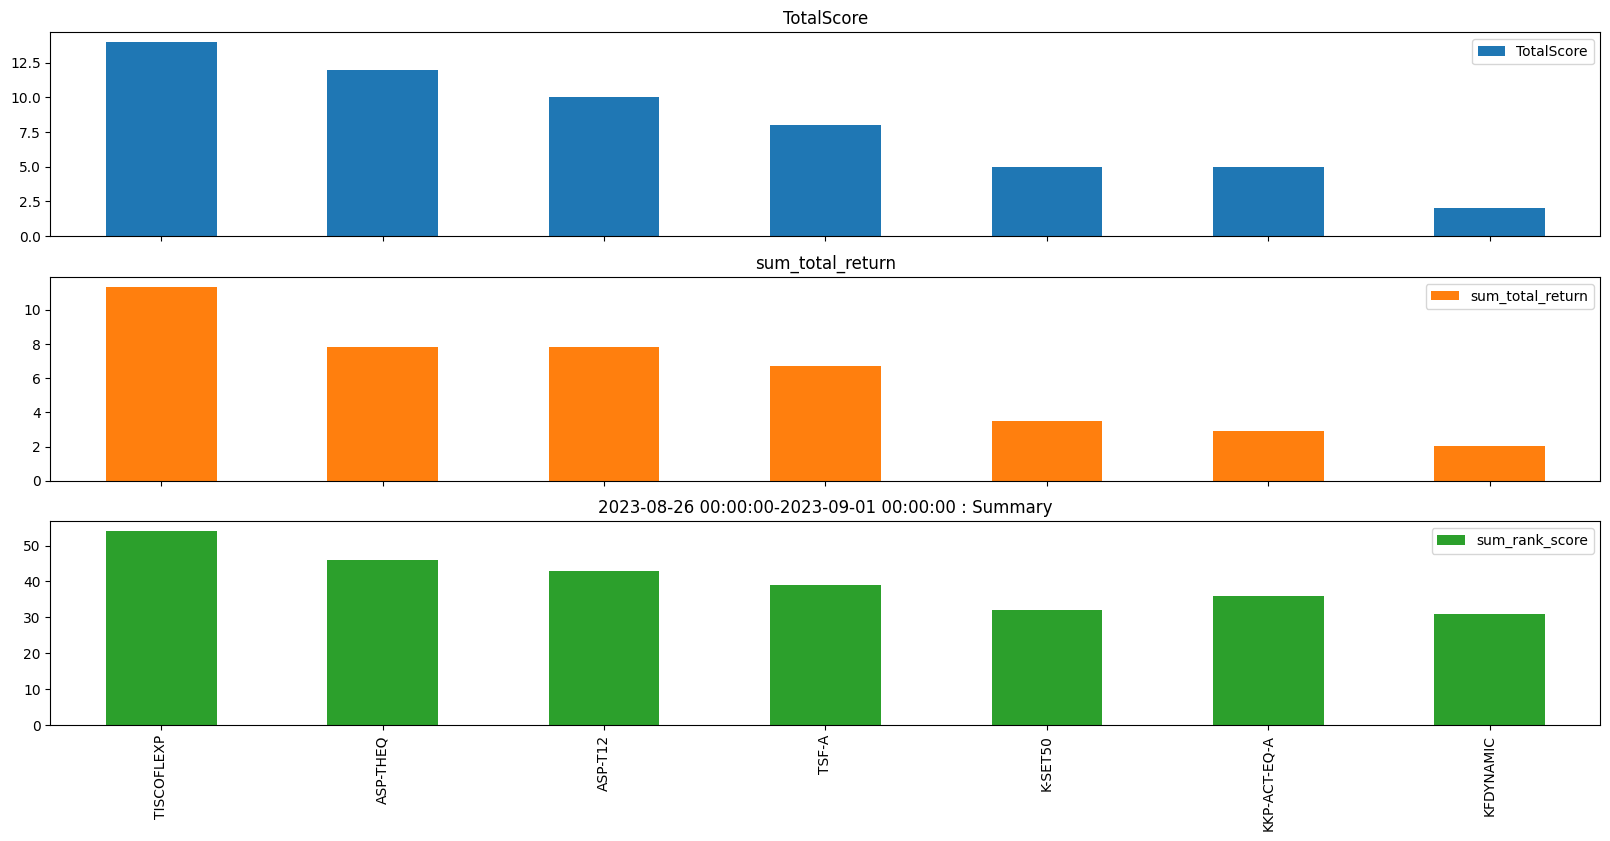

In [145]:
colToPlots=['TotalScore','sum_total_return','sum_rank_score' ]

dfSummary[colToPlots].plot(kind='bar',layout=(len(colToPlots),1),
                      subplots=True,figsize=(20, 3*len(colToPlots)))
plt.title(f"{start_date}-{end_date} : Summary")
plt.savefig(f'{report_path}\\{from_str}-{to_str}-summary.png')
   
plt.show()

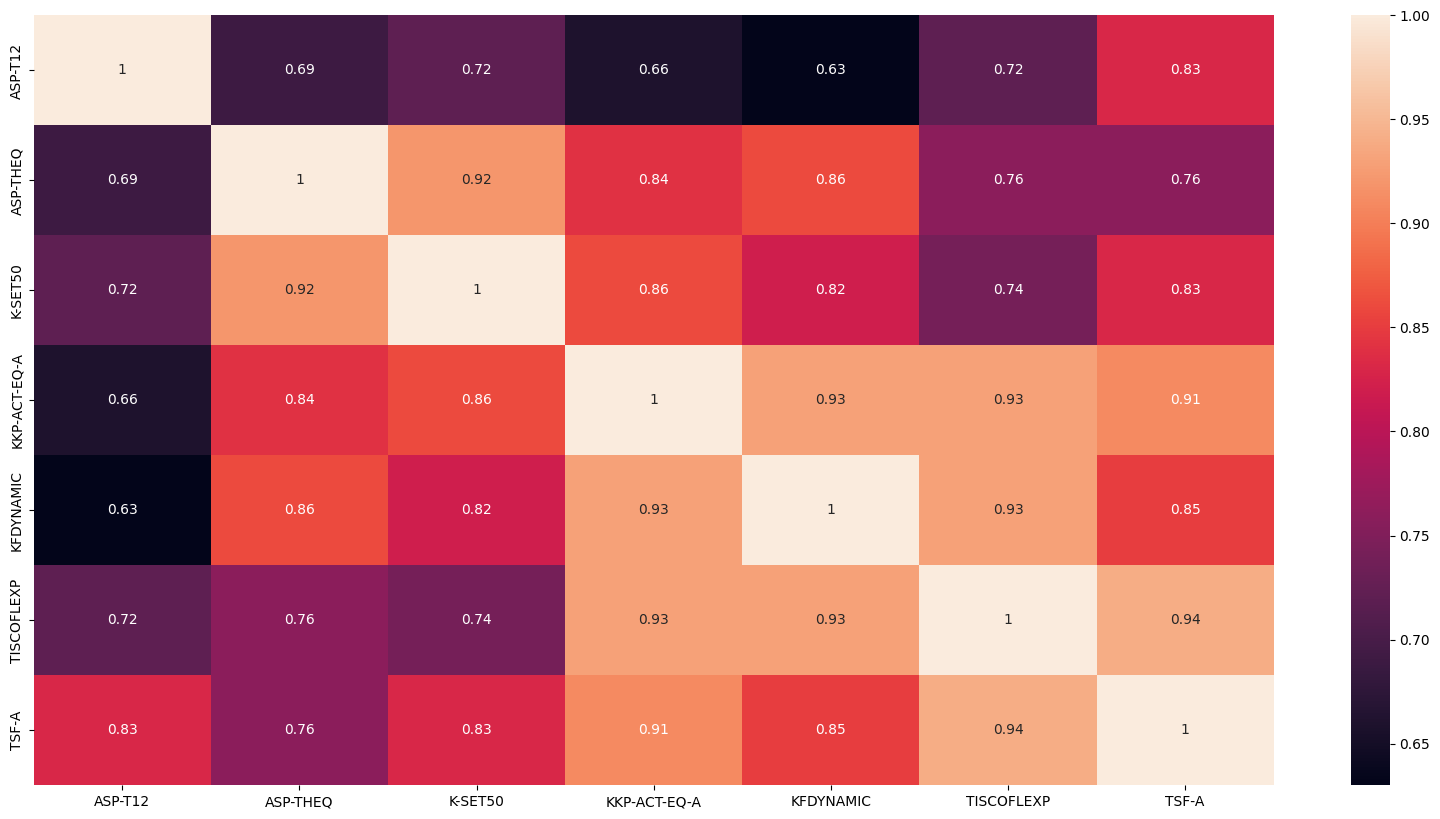

,ASP-T12,ASP-THEQ,K-SET50,KKP-ACT-EQ-A,KFDYNAMIC,TISCOFLEXP,TSF-A
ASP-T12,1.00,0.69,0.72,0.66,0.63,0.72,0.83
ASP-THEQ,0.69,1.00,0.92,0.84,0.86,0.76,0.76
K-SET50,0.72,0.92,1.00,0.86,0.82,0.74,0.83
KKP-ACT-EQ-A,0.66,0.84,0.86,1.00,0.93,0.93,0.91
KFDYNAMIC,0.63,0.86,0.82,0.93,1.00,0.93,0.85
TISCOFLEXP,0.72,0.76,0.74,0.93,0.93,1.00,0.94
TSF-A,0.83,0.76,0.83,0.91,0.85,0.94,1.00


In [146]:


corr_df = fundReturn_df.corr ()  
corr_df = corr_df .round(2)

fig = plt.figure(figsize = (20, 10))
heatmap = seaborn. heatmap(corr_df, annot = True)
plt.savefig(f'{report_path}\\Corr_{from_str}_{to_str}.png')
plt. show ()  

corr_df


In [147]:
report_file = os.path .join(report_path, "Report.xlsx")
writer=pd.ExcelWriter(report_file,engine='xlsxwriter') 

fundPerfByPeriod_df.to_excel(writer, sheet_name="Return")
fundRank_df.to_excel(writer, sheet_name="RANK")
dfFinalScore.to_excel(writer, sheet_name="Final Score")
dfSummary.to_excel(writer, sheet_name="Summary")
corr_df.to_excel(writer, sheet_name="Corr",index=True)

writer.save()




C:\Users\pongthsa\AppData\Local\Temp\ipykernel_9904\3740856608.py:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
